# PRCP-1005-Forest Cover Prediction

# PROJECT TEAM ID: PTID-CDS-MAY-23-1518

### Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Forest with the best accuracy..


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [5]:
# Find the shape of dataset

data.shape

(15120, 56)

**The dataset has 15120 records and 56 columns.**

In [6]:
# Find the datatype of each attribute

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

**The dataset has 56 integer columns.**

In [7]:
# Statistics for numeric attributes

data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<b> Simple statistics like count, mean, min, max, etc is calculated for attributes having numeric datatype.<br>
Some of the conclusions drawn from the above table are:<br> </b>
<ol>
    <li>The average elevation is 7560 m whereas the median elevation is 2996.</li>
    <li>The median aspect is 127 degree azimuth and the median slope is 13 degrees.</li>
    <li>The average horizontal distance to hydrology is 269.428 m and average vertical distance to hydrology is 46.418 m</li>
    <li>The maximum elevation is 3858 m.</li>
    <li>The minimum distance to roadways is 0 m and maximum distance is 7117 m.</li>
</ol>

In [8]:
# Check for duplicates

duplicate = data[data.duplicated()]
duplicate

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


**The dataset does not have any duplicate record.**

In [9]:
# Find the total number of missing values in each column

data.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


**The dataset does not have any null values.**

## Exploratory Data Analysis

In [10]:
plt.style.use('seaborn')

In [12]:
# PLot Correlation Matrix

corr = data.corr()


# PLot Correlation Matrix

corr = data.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

In [13]:
# Display top 10 pairs with highest correlation 

data.corr().unstack().sort_values().drop_duplicates()

Elevation                         Wilderness_Area4                 -0.783651
Hillshade_3pm                     Hillshade_9am                    -0.779965
Slope                             Hillshade_Noon                   -0.612613
Hillshade_9am                     Aspect                           -0.593997
Wilderness_Area4                  Wilderness_Area3                 -0.569200
                                                                      ...   
Hillshade_Noon                    Hillshade_3pm                     0.614526
Aspect                            Hillshade_3pm                     0.635022
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology    0.652142
Id                                Id                                1.000000
                                  Soil_Type7                             NaN
Length: 1433, dtype: float64

<b>Observations:-</b>
<ul>
    <li>There is a negative correlation of 0.78 between Elevation and Wilderness_Area4.</li>
    <li>There is a negative correlation of 0.59 between Hillshade_9am and Aspect.</li>
    <li>There is a negative correlation of 0.56 between Wilderness_Area4 and Wilderness_Area3.</li>

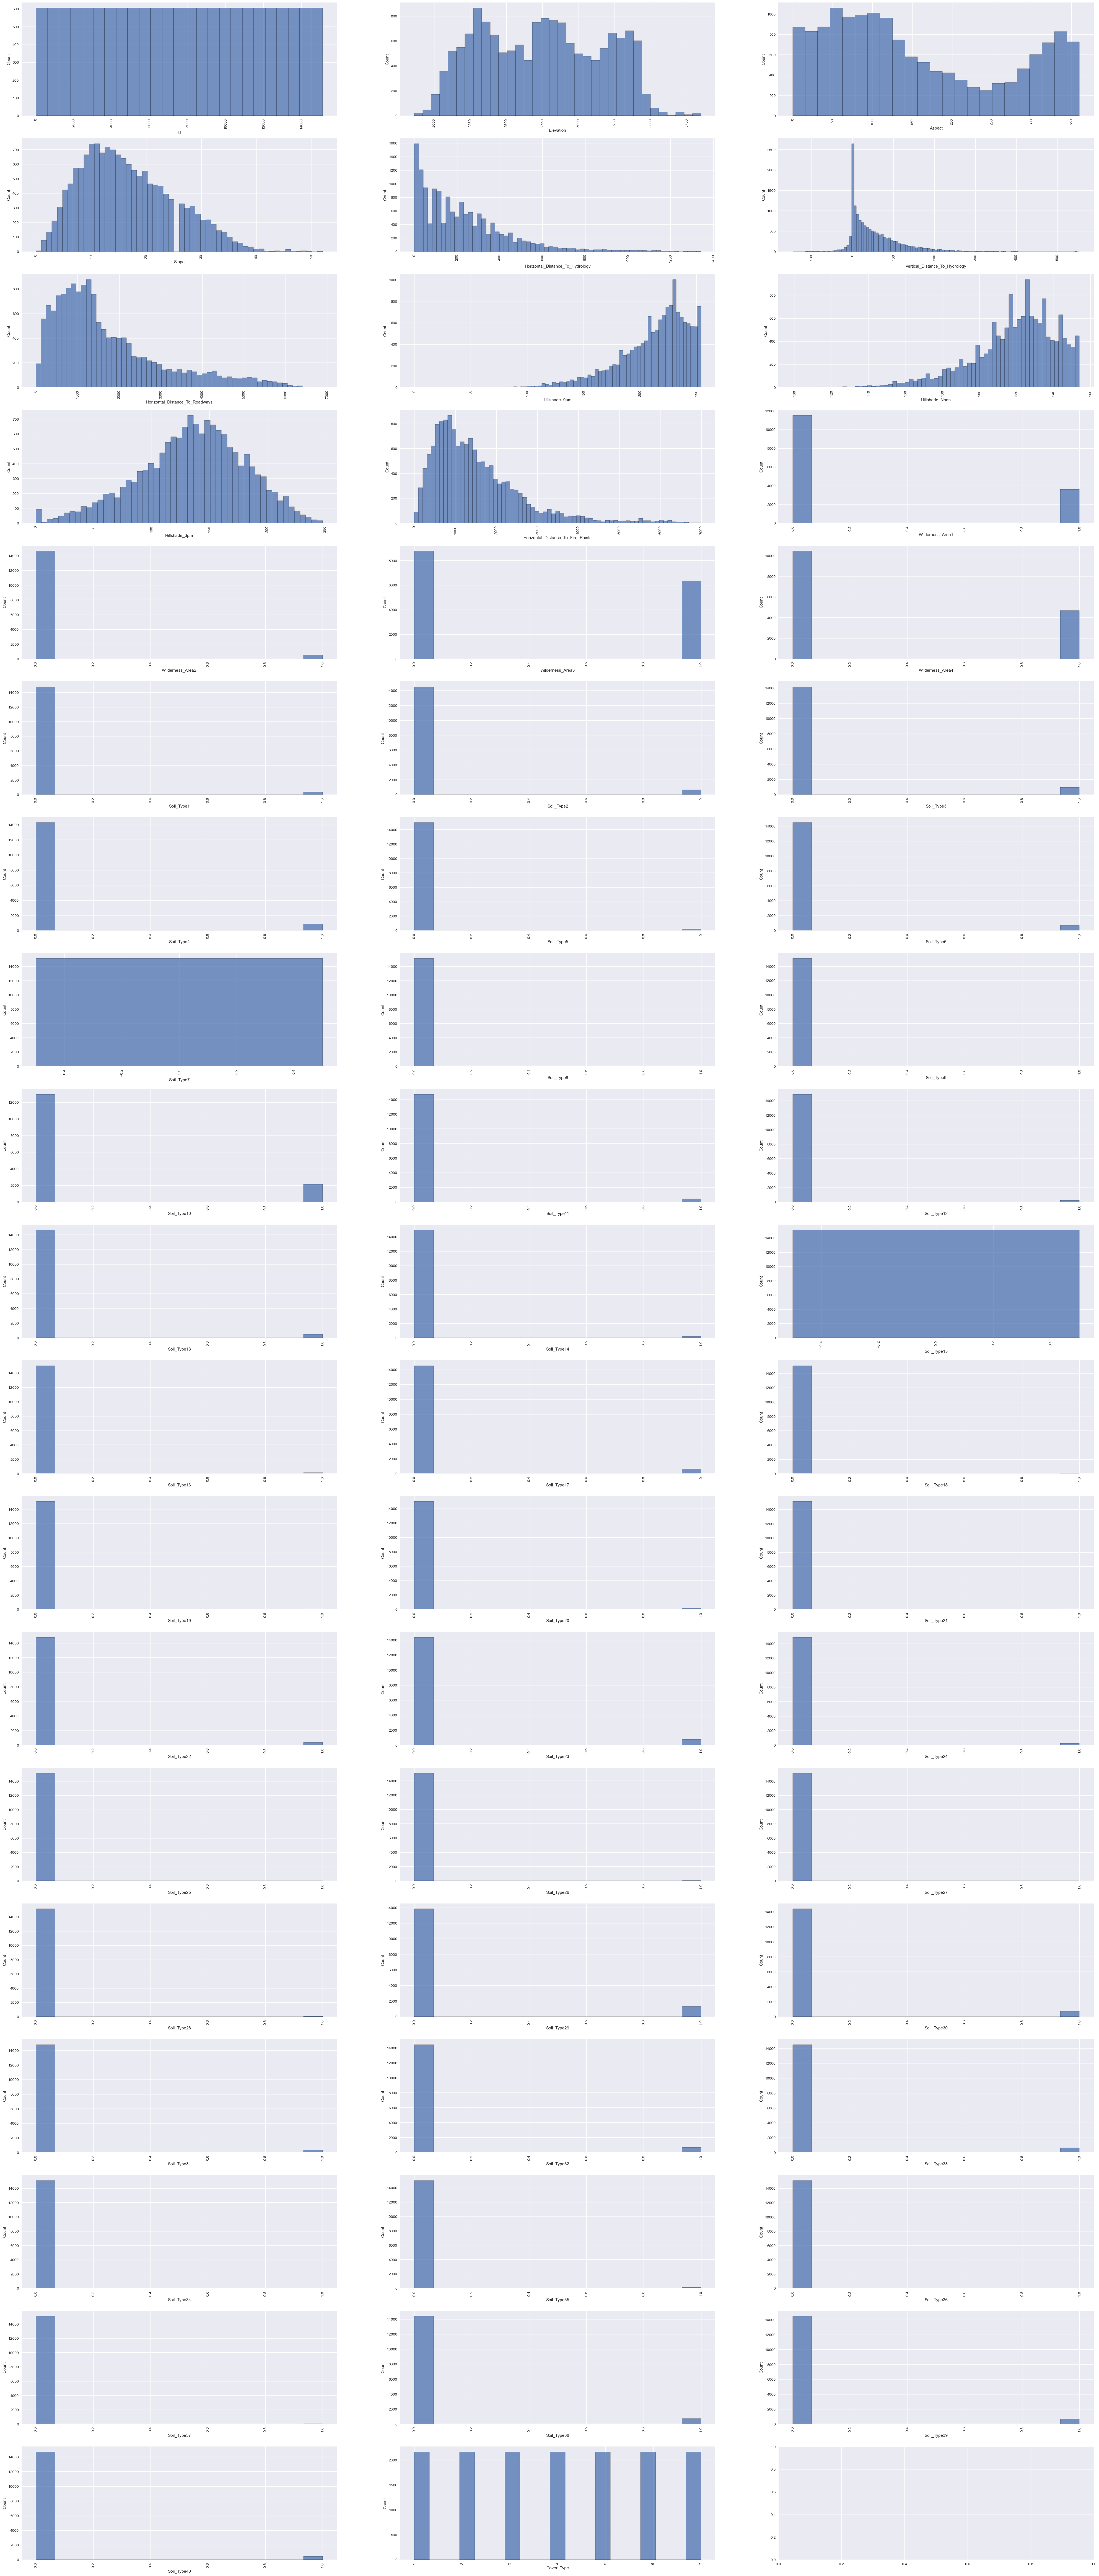

In [14]:
# Plotting all the attributes w.r.t its count

fig, ax = plt.subplots(19, 3, figsize=(50, 120))
for variable, subplot in zip(data, ax.flatten()):
    sns.histplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<Axes: xlabel='Cover_Type', ylabel='count'>

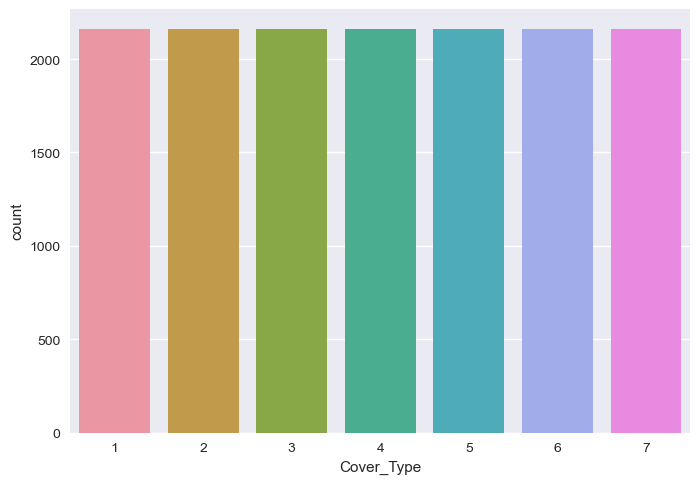

In [15]:
# Distribution of Cover_Type

sns.countplot(data=data, x='Cover_Type')

### Univariate Analysis

In [12]:
#Automated library for visualization

!pip install sweetviz     

In [17]:
import sweetviz as sv            # library for univariant analysis
my_report = sv.analyze(data)     # pass the original dataframe
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
data

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


## Model Creation

In [19]:
# Separate the independent and dependent variables

X = data.iloc[:, :-1]        # Independent variables
y = data.iloc[:, -1]         # Dependent variable

In [20]:
from imblearn.over_sampling import SMOTE
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [21]:
## balancing the data
# !pip install imblearn
# !pip3...
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [22]:
# Transform the dataset

sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [23]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [24]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({5: 2160, 2: 2160, 1: 2160, 7: 2160, 3: 2160, 6: 2160, 4: 2160})
SMOTE Classes Counter({4: 1650, 6: 1650, 1: 1650, 7: 1650, 2: 1650, 5: 1650, 3: 1650})


# svm

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.svm import SVC

In [27]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [28]:
# Predict output for X_test

y_hat=svclassifier.predict(X_test)

In [29]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.564021164021164

In [30]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       0.54      0.45      0.49       531
           2       0.53      0.36      0.43       556
           3       0.45      0.46      0.45       558
           4       0.57      0.82      0.67       510
           5       0.55      0.74      0.63       527
           6       0.50      0.22      0.31       556
           7       0.73      0.93      0.81       542

    accuracy                           0.56      3780
   macro avg       0.55      0.57      0.54      3780
weighted avg       0.55      0.56      0.54      3780



***observation:accuracy score of train data is 70% and that of test data is 56% hence the model is overfitted***

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier() #object creation for decision tree  
dt.fit(X_train, y_train) #training the model

DecisionTreeClassifier()

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score,precision_score


In [34]:
y_hat=dt.predict(X_train)#prediction
y_hat#predicted values 

array([4, 6, 6, ..., 2, 1, 6], dtype=int64)

In [35]:
print(classification_report(y_train,y_hat)) # train data

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1629
           2       1.00      1.00      1.00      1604
           3       1.00      1.00      1.00      1602
           4       1.00      1.00      1.00      1650
           5       1.00      1.00      1.00      1633
           6       1.00      1.00      1.00      1604
           7       1.00      1.00      1.00      1618

    accuracy                           1.00     11340
   macro avg       1.00      1.00      1.00     11340
weighted avg       1.00      1.00      1.00     11340



In [36]:
y_hat1=dt.predict(X_test)#prediction
y_hat1

array([7, 2, 1, ..., 1, 6, 2], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score,precision_score
print(classification_report(y_test,y_hat1)) # test data

              precision    recall  f1-score   support

           1       0.66      0.65      0.65       531
           2       0.64      0.61      0.62       556
           3       0.76      0.75      0.76       558
           4       0.92      0.94      0.93       510
           5       0.84      0.87      0.86       527
           6       0.77      0.75      0.76       556
           7       0.89      0.92      0.91       542

    accuracy                           0.78      3780
   macro avg       0.78      0.79      0.78      3780
weighted avg       0.78      0.78      0.78      3780



***observation:accuracy score of train data is 100% and that of test data is 80% hence the model is overfitted***

## Hyperparameter tunning for decision tree

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1,20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=3, cv=3)

#passing model to gridsearchCV 

#tree_cv.fit(X_train,y_train)#training data on gridsearch cv
#best_params = tree_cv.best_params_#it will give you best parameters 
#print(f"Best paramters: {best_params})")#printing  best parameters


In [40]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_leaf= 1,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [41]:
dt1.fit(X_train, y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=12)

In [42]:
y_pred_train1  = dt1.predict(X_train)

In [43]:
print(classification_report(y_train, y_pred_train1))   #train data

              precision    recall  f1-score   support

           1       0.86      0.85      0.86      1629
           2       0.82      0.79      0.81      1604
           3       0.90      0.85      0.88      1602
           4       0.97      0.98      0.98      1650
           5       0.89      0.95      0.92      1633
           6       0.87      0.90      0.88      1604
           7       0.97      0.96      0.97      1618

    accuracy                           0.90     11340
   macro avg       0.90      0.90      0.90     11340
weighted avg       0.90      0.90      0.90     11340



In [44]:
y_hat1 = dt1.predict(X_test)#predicting
y_hat1

array([7, 2, 1, ..., 1, 6, 2], dtype=int64)

In [45]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy #test data

              precision    recall  f1-score   support

           1       0.69      0.67      0.68       531
           2       0.67      0.62      0.64       556
           3       0.75      0.72      0.73       558
           4       0.92      0.95      0.93       510
           5       0.82      0.89      0.85       527
           6       0.76      0.77      0.76       556
           7       0.91      0.92      0.91       542

    accuracy                           0.79      3780
   macro avg       0.79      0.79      0.79      3780
weighted avg       0.79      0.79      0.79      3780



***Observation:The accuracy of trained data after using hyperparameter tuning is 90% and that of test data is 79%***

## RandomForest Regression

In [46]:
from sklearn.ensemble import RandomForestClassifier
MR=RandomForestClassifier(n_estimators=100)
MR.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
rf_hat=MR.predict(X_train)#prediction
rf_hat#predicted values 

array([4, 6, 6, ..., 2, 1, 6], dtype=int64)

In [48]:
print(classification_report(y_train,rf_hat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1629
           2       1.00      1.00      1.00      1604
           3       1.00      1.00      1.00      1602
           4       1.00      1.00      1.00      1650
           5       1.00      1.00      1.00      1633
           6       1.00      1.00      1.00      1604
           7       1.00      1.00      1.00      1618

    accuracy                           1.00     11340
   macro avg       1.00      1.00      1.00     11340
weighted avg       1.00      1.00      1.00     11340



In [49]:
rf_pred=MR.predict(X_test)

In [50]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           1       0.77      0.76      0.77       531
           2       0.80      0.70      0.75       556
           3       0.85      0.84      0.85       558
           4       0.93      0.99      0.96       510
           5       0.91      0.96      0.93       527
           6       0.87      0.87      0.87       556
           7       0.92      0.97      0.95       542

    accuracy                           0.87      3780
   macro avg       0.87      0.87      0.87      3780
weighted avg       0.87      0.87      0.87      3780



***observation:accuracy score of train data is 100% and that of test data is 87% hence the model is overfitted***

## Hyperparameter tunning for RandomForest

In [51]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

#rf_cv.fit(X_train, y_train)##training data on randomsearch cv
#rf_best_params = rf_cv.best_params_##it will give you best parameters 
#print(f"Best paramters: {rf_best_params})")##printing  best parameters
 


In [52]:
rf_clf2 = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)#training 
y_predict=rf_clf2.predict(X_test)#testing


In [53]:
y_pred_train  = rf_clf2.predict(X_train)

In [54]:
print(classification_report(y_train, y_pred_train))   #train data

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      1629
           2       0.97      0.93      0.95      1604
           3       0.98      0.96      0.97      1602
           4       0.98      1.00      0.99      1650
           5       0.97      0.99      0.98      1633
           6       0.96      0.98      0.97      1604
           7       0.98      1.00      0.99      1618

    accuracy                           0.97     11340
   macro avg       0.97      0.97      0.97     11340
weighted avg       0.97      0.97      0.97     11340



In [55]:
print(classification_report(y_test, y_predict))   #train data

              precision    recall  f1-score   support

           1       0.75      0.75      0.75       531
           2       0.79      0.67      0.72       556
           3       0.84      0.84      0.84       558
           4       0.92      0.99      0.95       510
           5       0.89      0.94      0.91       527
           6       0.87      0.84      0.85       556
           7       0.92      0.97      0.94       542

    accuracy                           0.86      3780
   macro avg       0.85      0.86      0.85      3780
weighted avg       0.85      0.86      0.85      3780



***Observation:The accuracy of trained data after using hyperparameter tuning is 97% and that of test data is 85%***

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier(n_neighbors=5) ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [57]:
knn_tr=KNN1.predict(X_train)

In [58]:
print(classification_report(y_train,knn_tr))

              precision    recall  f1-score   support

           1       0.86      0.80      0.83      1629
           2       0.85      0.71      0.78      1604
           3       0.89      0.83      0.86      1602
           4       0.89      0.97      0.93      1650
           5       0.87      0.98      0.92      1633
           6       0.88      0.89      0.89      1604
           7       0.92      0.99      0.95      1618

    accuracy                           0.88     11340
   macro avg       0.88      0.88      0.88     11340
weighted avg       0.88      0.88      0.88     11340



In [73]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           1       0.73      0.67      0.70       531
           2       0.79      0.60      0.69       556
           3       0.79      0.71      0.74       558
           4       0.80      0.95      0.87       510
           5       0.84      0.96      0.90       527
           6       0.83      0.80      0.82       556
           7       0.85      0.98      0.91       542

    accuracy                           0.81      3780
   macro avg       0.80      0.81      0.80      3780
weighted avg       0.80      0.81      0.80      3780



***Observation:The accuracy of trained data is 88% and that of test data is 81%***

## Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
dt=GradientBoostingClassifier()
dt.fit(X_train, y_train)

GradientBoostingClassifier()

In [61]:
y_pred2=dt.predict(X_train)
y_pred2

array([4, 6, 6, ..., 1, 1, 6], dtype=int64)

In [62]:
y_pred3=dt.predict(X_test)
y_pred3

array([7, 1, 1, ..., 2, 6, 2], dtype=int64)

In [63]:
print(classification_report(y_train,y_pred2))   #train data

              precision    recall  f1-score   support

           1       0.80      0.80      0.80      1629
           2       0.82      0.67      0.74      1604
           3       0.84      0.82      0.83      1602
           4       0.93      0.97      0.95      1650
           5       0.85      0.93      0.89      1633
           6       0.84      0.86      0.85      1604
           7       0.93      0.97      0.95      1618

    accuracy                           0.86     11340
   macro avg       0.86      0.86      0.86     11340
weighted avg       0.86      0.86      0.86     11340



In [64]:
print(classification_report(y_test, y_pred3)) #test data

              precision    recall  f1-score   support

           1       0.73      0.70      0.71       531
           2       0.76      0.61      0.68       556
           3       0.78      0.77      0.77       558
           4       0.91      0.97      0.94       510
           5       0.81      0.91      0.86       527
           6       0.80      0.80      0.80       556
           7       0.90      0.96      0.93       542

    accuracy                           0.82      3780
   macro avg       0.81      0.82      0.81      3780
weighted avg       0.81      0.82      0.81      3780



***Observation:accuracy of train data is 86% and of test data is 81%***

## Logistic Regression

In [65]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [66]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data, y,random_state=3)

In [67]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [68]:
y_pred1 = LR.predict(X_train)
y_pred1

array([6, 4, 6, ..., 1, 1, 6], dtype=int64)

In [69]:
y_pred = LR.predict(X_test)
y_pred

array([1, 2, 7, ..., 2, 6, 2], dtype=int64)

In [70]:
print(classification_report(y_train,y_pred2))   #train data

              precision    recall  f1-score   support

           1       0.80      0.80      0.80      1629
           2       0.82      0.67      0.74      1604
           3       0.84      0.82      0.83      1602
           4       0.93      0.97      0.95      1650
           5       0.85      0.93      0.89      1633
           6       0.84      0.86      0.85      1604
           7       0.93      0.97      0.95      1618

    accuracy                           0.86     11340
   macro avg       0.86      0.86      0.86     11340
weighted avg       0.86      0.86      0.86     11340



In [71]:
print(classification_report(y_test, y_pred)) #test data

              precision    recall  f1-score   support

           1       0.62      0.67      0.65       531
           2       0.61      0.50      0.55       556
           3       0.66      0.58      0.62       558
           4       0.80      0.90      0.85       510
           5       0.69      0.78      0.73       527
           6       0.64      0.62      0.63       556
           7       0.88      0.88      0.88       542

    accuracy                           0.70      3780
   macro avg       0.70      0.71      0.70      3780
weighted avg       0.70      0.70      0.70      3780



***Observation:Accuracy of trained data is 86% and that of test data is 70%***

## Conclusion
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature set.

- Testing multiple algorithms with fine-tuning hyperparamters gave some understanding on the model performance for various algorithms on this specific dataset.
- The hyperparameter tuning on RandomForest helps in the good performance on the current dataset.
- We used Decision Tree, Random Forest,Support Vector Machine,KNN, Gradient Boosting
- RandomForest with hyperparameter tuning is preferred among all the models as it gave the best accuracy.